In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
import io
df = pd.read_csv('/home/suraj/Desktop/fods_1.csv')

In [3]:
df = (df - df.min()) / (df.max()-df.min())

In [4]:
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,0.364534
1,0.582532,0.073727,0.423980
2,0.785238,0.354845,0.694912
3,0.763050,0.346939,0.665088
4,0.674234,0.323221,0.590126


In [5]:
def split_train_test(data, test_ratio):
  #set the random seed
  np.random.seed(42)
  #shuffle the dataset
  shuffled_indices = np.random.permutation(len(data))
  #Calculate the size of the data set.
  test_set_size = int(len(data)*test_ratio)
  #split dataset to get training and test sets.
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set , test_set = split_train_test(df, 0.2)
print(df.shape , train_set.shape , test_set.shape)

train_X = train_set.iloc[:, :-1].values
train_y = train_set.iloc[:,-1].values.astype(np.float128)
test_X = test_set.iloc[:, :-1].values
test_y = test_set.iloc[:,-1].values.astype(np.float128)
print(train_X.shape,train_y.shape, test_X.shape, test_y.shape)

(546, 3) (437, 3) (109, 3)
(437, 2) (437,) (109, 2) (109,)


In [7]:
# adding 1's
train_X = np.column_stack((np.ones(train_X.shape[0]), train_X)).astype(np.float128)
test_X = np.column_stack((np.ones(test_X.shape[0]), test_X)).astype(np.float128)

print(train_X.shape,train_y.shape, test_X.shape, test_y.shape)

(437, 3) (437,) (109, 3) (109,)


In [8]:
def predict(X, w):
  return X@w

def loss(y, yhat):
  return np.sum(np.square(y-yhat))/np.float128(2)

In [9]:
def rms_error(y, yhat):
  return np.sqrt(np.sum(np.square(y-yhat))/len(y))

In [10]:
def gradient(X, w, y):
  return ( X.T @ ( X@w - y ) ) 

def GradDesc(X, w0, y, eta, max_iter=10000):
  for _ in range(max_iter):
      w0 = w0 - eta*(gradient(X, w0, y))
  return w0

In [11]:
def sgd_gradient(X, w, y):
  return np.dot(X.T, (np.dot(X,w) - y)).astype(np.float128)

def SGD(X, w0, y, eta, max_iter=1000):
  for i in range(max_iter):
    index = np.random.randint(0,X.shape[0])
    X1 = np.array(X[index])
    y1 = y[index]
    w0 = w0 - eta*(sgd_gradient(X1, w0, y1))
  return w0

Degree 1

In [12]:
w = GradDesc(train_X, np.zeros(train_X.shape[1]).astype(np.float128), train_y, np.float128(0.001), 1000)
print("W =", w)
print("GDA training loss: ",loss(train_y, predict(train_X, w)))
print("GDA testing loss: ",loss(test_y, predict(test_X, w)))

W = [0.02690596 0.64337512 0.25625404]
GDA training loss:  4.150632585468080815
GDA testing loss:  0.93166806214472916046


In [13]:
w_sgd = SGD(train_X, np.zeros(train_X.shape[1]).astype(np.float128) , train_y, np.float128(0.1) , 10000)
print("W =",w_sgd)
print("SGD training loss: ",loss(train_y, predict(train_X, w_sgd)))
print("SGD testing loss: ",loss(test_y, predict(test_X, w_sgd)))

W = [0.01604791 0.59054254 0.25871908]
SGD training loss:  4.506917267134233172
SGD testing loss:  1.0015768175076212476


# Degree 0 - 9

In [14]:
def Polynomial_features(X , n):
  R = []
  for j in range(0,n+1):
    for i in range(0,n+1):
      if i+j <= n:
        R.append(np.power(X[:,1],i)*np.power(X[:,2],j))
  return (np.array(R).T)

In [15]:
X = np.array(
    [[1,2,3],
     [1,5,6],
     [1,1,2],
     [1,9,2]])

Polynomial_features(X,2)  # degree = 2

array([[ 1,  2,  4,  3,  6,  9],
       [ 1,  5, 25,  6, 30, 36],
       [ 1,  1,  1,  2,  2,  4],
       [ 1,  9, 81,  2, 18,  4]])

In [16]:
w_result_array = []
for n in range(0,10):
  train_X_d = Polynomial_features(train_X,n).astype(np.float128)
  test_X_d = Polynomial_features(test_X,n).astype(np.float128)
  w = GradDesc(train_X_d, np.zeros(train_X_d.shape[1]).astype(np.float128), train_y, np.float128(0.001), 10000)
  w_result_array.append(w)
  print("Degree:",n, end='\t')
  print("GDA training loss: ",loss(train_y, predict(train_X_d, w)), end='\t')
  print("GDA testing loss: ",loss(test_y, predict(test_X_d, w)), end='\n')

Degree: 0	GDA training loss:  6.111693694477511244	GDA testing loss:  1.5622206617194221918
Degree: 1	GDA training loss:  4.1504344074169947478	GDA testing loss:  0.9299447145208079344
Degree: 2	GDA training loss:  3.9963999487206197624	GDA testing loss:  0.89167944687431437687
Degree: 3	GDA training loss:  3.986126048055051729	GDA testing loss:  0.89016862444933609857
Degree: 4	GDA training loss:  3.970504663258521487	GDA testing loss:  0.88879824533593414085
Degree: 5	GDA training loss:  3.9580000329468465715	GDA testing loss:  0.88841542068615563904
Degree: 6	GDA training loss:  3.9513784097763294902	GDA testing loss:  0.8890128595289065334
Degree: 7	GDA training loss:  3.9483671490093141796	GDA testing loss:  0.8897976006437402069
Degree: 8	GDA training loss:  3.9469232362155018236	GDA testing loss:  0.89038407316807991143
Degree: 9	GDA training loss:  3.9460896482696125314	GDA testing loss:  0.89072334291327607994


In [17]:
for n in range(0,10):
  train_X_d = Polynomial_features(train_X,n).astype(np.float128)
  test_X_d = Polynomial_features(test_X,n).astype(np.float128)
  w = SGD(train_X_d, np.zeros(train_X_d.shape[1]).astype(np.float128), train_y, np.float128(0.001), max_iter = 10000)
  print("Degree:",n, end='\t')
  print("SGD training loss: ",loss(train_y, predict(train_X_d, w)), end='\t')
  print("SGD testing loss: ",loss(test_y, predict(test_X_d, w)), end='\n')

Degree: 0	SGD training loss:  6.1170113135483753773	SGD testing loss:  1.5545918034469308384
Degree: 1	SGD training loss:  4.836717290332821309	SGD testing loss:  1.2214145672013613656
Degree: 2	SGD training loss:  4.459647080483491564	SGD testing loss:  1.0910590759808977694
Degree: 3	SGD training loss:  4.3725165667437451873	SGD testing loss:  1.0502280235192480896
Degree: 4	SGD training loss:  4.324728766983356002	SGD testing loss:  1.0240392675671088472
Degree: 5	SGD training loss:  4.321686519034075293	SGD testing loss:  1.0258308840087332669
Degree: 6	SGD training loss:  4.3341002387467885155	SGD testing loss:  1.0311761099142340704
Degree: 7	SGD training loss:  4.327987060289374112	SGD testing loss:  1.0263959240390452128
Degree: 8	SGD training loss:  4.3216902830958205143	SGD testing loss:  1.019355895048470077
Degree: 9	SGD training loss:  4.3135458714480384144	SGD testing loss:  1.014224918188161381


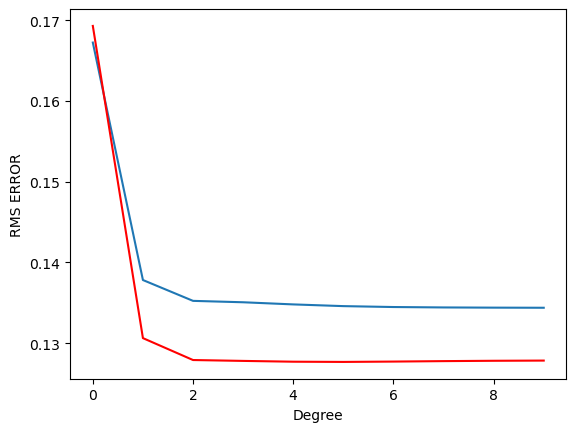

In [18]:
x = []
for _ in range(0,10):
  x.append(_)
trainy= [] 
testy= []

for i in x:
  train_X_d = Polynomial_features(train_X,i).astype(np.float128)
  test_X_d = Polynomial_features(test_X,i).astype(np.float128)
  w = GradDesc(train_X_d, np.zeros(train_X_d.shape[1]).astype(np.float128), train_y, np.float128(0.001), 10000)
  trainy.append(rms_error(train_y,predict(train_X_d, w)))
  testy.append(rms_error(test_y,predict(test_X_d, w)))
plt.plot(x, trainy)
plt.plot(x,testy,'r')
plt.xlabel('Degree')
plt.ylabel('RMS ERROR')
plt.show()

# Regularized

In [19]:
def regularized_loss(y, yhat, w, q, l):
    w_wo = w[1:]
    if q == 2 or q == 4:
      return ( np.sum(np.square(y-yhat)) + l*np.sum(np.power(w_wo,q)) )/2
    if q == 1:
      return ( np.sum(np.square(y-yhat)) + l*np.sum(np.absolute(w_wo)) )/2
    if q == 0.5:
      return ( np.sum(np.square(y-yhat)) + l*np.sum( np.power(np.absolute(w_wo),0.5) ) )/2

In [20]:
def regularized_gradient(X, w, y, q , l):
  w_wo = w.copy()
  w_wo = w_wo[1:]
  if q == 2:
    return ( (X.T @ ( X@w - y )) + np.insert(l*w_wo, 0, [0], axis=0) )
  if q == 4:
    return ( (X.T @ ( X@w - y )) + np.insert( 2*l*np.power(w_wo,3), 0, [0], axis=0) )
  if q == 1:
    return ( ( X.T @ ( X@w - y ) ) + np.insert( l*np.sign(w_wo)/2, 0, [0], axis=0) )
  if q == 0.5:
    return ( ( X.T @ ( X@w - y ) ) + np.insert( l*np.sign(w_wo)*np.power(np.absolute(w_wo),-0.5)/4 , 0, [0], axis=0) )

In [21]:
def regularized_GradDesc(X, w0, y, eta, q, l, max_iter=1000):
  for i in range(max_iter):
      w0 = w0- eta*(regularized_gradient(X, w0, y, q, l))
      regularized_gradient(X, w0, y, q, l)
  return w0

In [22]:
for q in [0.5,1,2,4]:
  print("\n For q = ", q)
  for l in [0, 1e-20, 1e-15, 1e-10, 0.0001, 0.1, 1, 2 ,3]:
    if q==0.5:
      w_rgd = regularized_GradDesc(train_X, np.ones(train_X.shape[1]).astype(np.float128), train_y, np.float128(0.001), q, np.float128(l), max_iter = 1000)
    else:
      w_rgd = regularized_GradDesc(train_X, np.zeros(train_X.shape[1]).astype(np.float128), train_y, np.float128(0.001), q, np.float128(l), max_iter = 1000)
    print("lambda: ",l, end="\t\t")
    print("w: ",w_rgd, end="\t\t")
    print("regularized training loss: ",regularized_loss(train_y, predict(train_X, w_rgd), w_rgd , q,l), end="\t")
    print("regularized testing loss: ",regularized_loss(test_y, predict(test_X, w_rgd), w_rgd ,q,l),end="\n")


 For q =  0.5
lambda:  0		w:  [0.02522694 0.64682837 0.25527044]		regularized training loss:  4.1505076312735202605	regularized testing loss:  0.93097355970930684437
lambda:  1e-20		w:  [0.02522694 0.64682837 0.25527044]		regularized training loss:  4.1505076312735202605	regularized testing loss:  0.93097355970930684437
lambda:  1e-15		w:  [0.02522694 0.64682837 0.25527044]		regularized training loss:  4.1505076312735209158	regularized testing loss:  0.9309735597093075221
lambda:  1e-10		w:  [0.02522694 0.64682837 0.25527044]		regularized training loss:  4.1505076313390839994	regularized testing loss:  0.93097355977709904797
lambda:  0.0001		w:  [0.02523017 0.6468245  0.2552667 ]		regularized training loss:  4.1505731948602373263	regularized testing loss:  0.9310413516451371425
lambda:  0.1		w:  [0.02846385 0.64295691 0.25149366]		regularized training loss:  4.2159179212451476605	regularized testing loss:  0.9984956507315867342
lambda:  1		w:  [0.0587082  0.6080947  0.21358554]		regul

/tmp/ipykernel_41488/3063380441.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  poly = Polynomial_features( np.array([[1,x1,x2],[1,1,1]]) , i )[0]
/tmp/ipykernel_41488/3063380441.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection='3d')


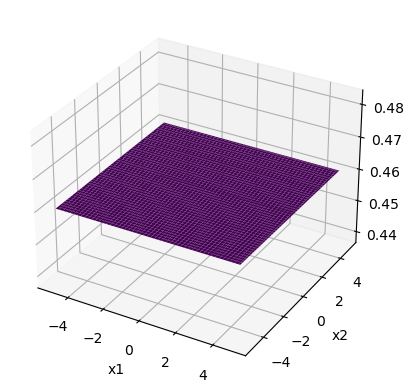

[0.46039484]


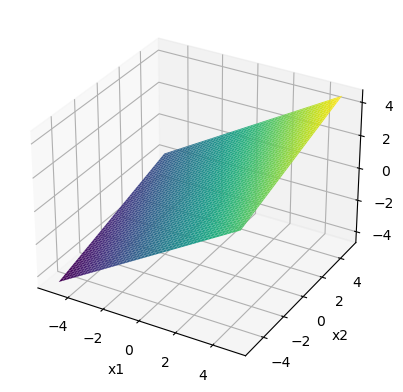

[0.02264854 0.65217279 0.25367836]


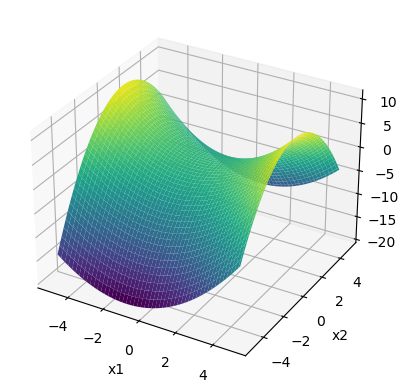

[ 0.08209514  0.20343558  0.40384459  0.78299138 -0.14658123 -0.62787222]


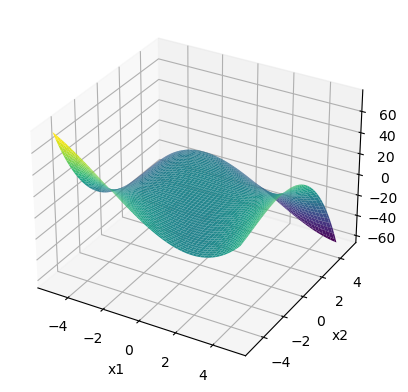

[ 0.09564441  0.20781914  0.25735303  0.20642127  0.5937453   0.17509625
 -0.22144489 -0.17822278 -0.39327654 -0.18818097]


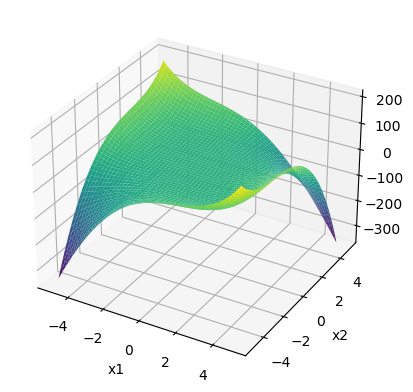

[ 0.12918006  0.155066    0.19313523  0.2103622   0.12666272  0.48606778
  0.30555055  0.00756839 -0.19574582 -0.17817456 -0.16189342 -0.31997282
 -0.13902743 -0.24940295  0.06732667]


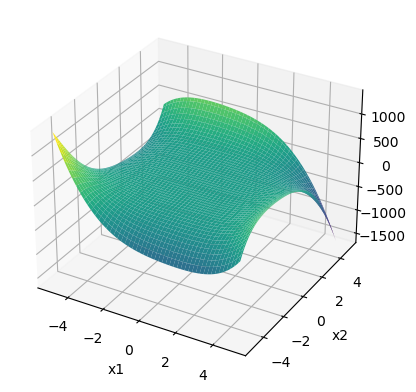

[ 0.15536907  0.11649985  0.14914196  0.19315223  0.16051168  0.07533928
  0.44852797  0.32793124  0.0998275  -0.04880932 -0.16577469 -0.21540257
 -0.07606168 -0.15664483 -0.23163139 -0.17885418 -0.14885729 -0.22162343
  0.00824903 -0.11893086  0.1705772 ]


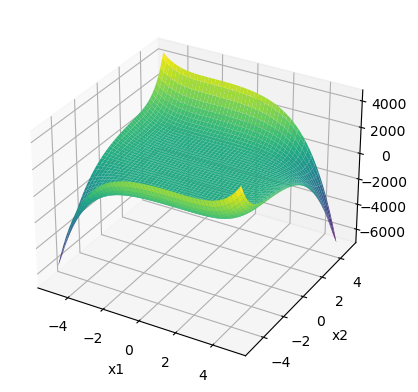

[ 0.16875703  0.10152194  0.12569326  0.17115545  0.1603824   0.11030402
  0.04504734  0.44561966  0.30964083  0.12065017  0.00876337 -0.07404909
 -0.14000257 -0.23661717 -0.04973886 -0.07990222 -0.12216276 -0.165553
 -0.21324624 -0.10460648 -0.1271761  -0.15392092 -0.04790738 -0.07861469
 -0.12708671  0.0896069  -0.04584146  0.19133486]


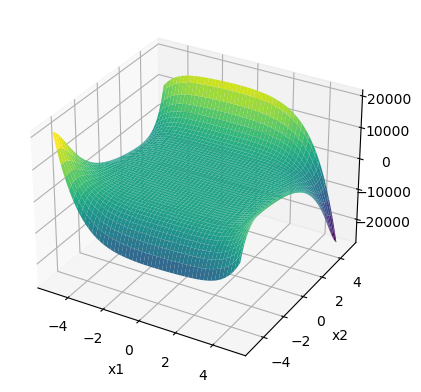

[ 0.17281481  0.10149943  0.11718882  0.15376041  0.14887245  0.11636321
  0.07446192  0.03327673  0.45432873  0.28369896  0.11336565  0.02282034
 -0.0378666  -0.08274343 -0.11566612 -0.2419086  -0.04528944 -0.04792668
 -0.07007136 -0.09753574 -0.12264206 -0.23038427 -0.08425798 -0.07779704
 -0.08829091 -0.10390174 -0.08347939 -0.05828075 -0.07651202 -0.08883451
  0.03325254 -0.03329455 -0.0709803   0.11532828 -0.01161254  0.17857955]


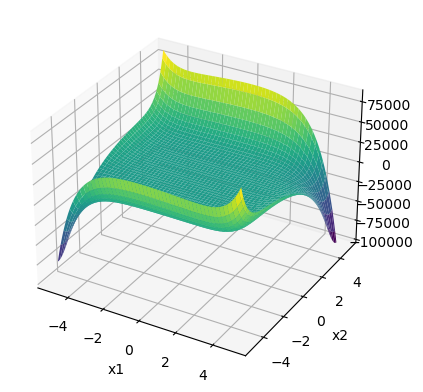

[ 0.17222424  0.10747985  0.1168724   0.14269247  0.13659896  0.11159777
  0.08219153  0.05535349  0.03303253  0.46355622  0.26183942  0.09944296
  0.0200542  -0.02769842 -0.05946641 -0.08020633 -0.09259929 -0.2389086
 -0.0468213  -0.03617916 -0.04744037 -0.065349   -0.08208314 -0.09425191
 -0.23504218 -0.07346526 -0.05220451 -0.05410865 -0.06366194 -0.07359353
 -0.10186296 -0.04632555 -0.0480544  -0.05283876 -0.05863622 -0.00122827
 -0.02609528 -0.04524802 -0.05164556  0.06525112 -0.01137813 -0.04136167
  0.11466253  0.00357161  0.15646164]


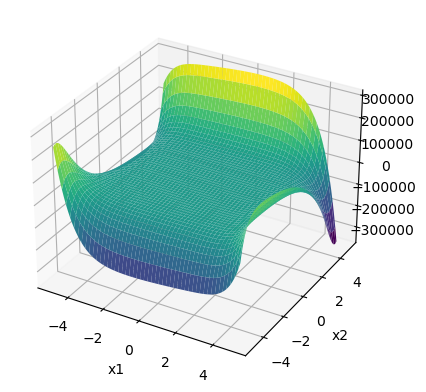

[ 0.17004711  0.11438182  0.12000735  0.13664807  0.12703363  0.10443311
  0.08117975  0.06221908  0.04813376  0.03792104  0.46999266  0.24622543
  0.08690948  0.01283817 -0.02790303 -0.05205062 -0.06540456 -0.07111276
 -0.07157181 -0.23336469 -0.04896131 -0.03260528 -0.03859633 -0.05126676
 -0.06301592 -0.07069633 -0.07384877 -0.23326142 -0.06649576 -0.03855522
 -0.03659145 -0.04308721 -0.050312   -0.05518825 -0.10941169 -0.03796452
 -0.03150748 -0.03293292 -0.03683154 -0.04039246 -0.02057888 -0.02073374
 -0.0297972  -0.03264618 -0.03372307  0.03401249 -0.01081635 -0.02875996
 -0.03188089  0.07257435 -0.00107619 -0.025168    0.10492868  0.01065878
  0.13423071]


In [23]:
for i in range(0,10):
  def f(x1, x2):
    Y = 0
    poly = Polynomial_features( np.array([[1,x1,x2],[1,1,1]]) , i )[0]
    Y += np.dot(w_result_array[i],poly)
    return Y

  w1 = np.linspace(-5,5, 100)
  w2 = np.linspace(-5,5, 100)
  W1, W2 = np.meshgrid(w1, w2)
  Y = f(W1,W2)

  fig=plt.figure()
  axes=fig.gca(projection='3d')
  axes.plot_surface(W1,W2,Y, cmap='viridis')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()
  print(w_result_array[i])

In [24]:
for q in [0.5,1,2,4]:
  print("\n For q = ", q)
  for l in [1.4,0.1,0.035,0.052]:
    if q==0.5:
      w_rgd = regularized_GradDesc(train_X, np.ones(train_X.shape[1]).astype(np.float128), train_y, np.float128(0.001), q, np.float128(l), max_iter = 1000)
    else:
      w_rgd = regularized_GradDesc(train_X, np.zeros(train_X.shape[1]).astype(np.float128), train_y, np.float128(0.001), q, np.float128(l), max_iter = 1000)
    print("lambda: ",l, end="\t\t")
    print("w: ",w_rgd, end="\t\t")
    print("RMS training error: ",rms_error(train_y, predict(train_X, w_rgd)), end="\t")
    print("RMS testing error: ",rms_error(test_y, predict(test_X, w_rgd)), end="\n")


 For q =  0.5
lambda:  1.4		w:  [0.07291241 0.59297457 0.19327898]		RMS training error:  0.13845590756307553222	RMS testing error:  0.13358655076532628741
lambda:  0.1		w:  [0.02846385 0.64295691 0.25149366]		RMS training error:  0.13782805347033946886	RMS testing error:  0.13086366476270246978
lambda:  0.035		w:  [0.02635731 0.64547403 0.25395629]		RMS training error:  0.13782484000329772917	RMS testing error:  0.13075568710428230106
lambda:  0.052		w:  [0.02690733 0.64481594 0.25331501]		RMS training error:  0.1378254688361844262	RMS testing error:  0.13078371629263154611

 For q =  1
lambda:  1.4		w:  [0.09665954 0.54011076 0.21448622]		RMS training error:  0.13872875818540012515	RMS testing error:  0.13440482907445875022
lambda:  0.1		w:  [0.03188836 0.6359991  0.25327062]		RMS training error:  0.13783540459185287528	RMS testing error:  0.13096831666941221068
lambda:  0.035		w:  [0.0286498  0.64079351 0.25520984]		RMS training error:  0.13782837900581003885	RMS testing error:  0.1